In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import decomposition 
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD

In [13]:
df = pd.read_csv(r"C:\Users\zhaoe\OneDrive\Documents\ratings.csv")

table = pd.pivot_table(df, values='rating', columns=['movieId'], index=['userId'])
table = table.fillna(0)

sliced_table = table.head(10)
sliced_table = sliced_table.append(table.tail(10))
print(sliced_table)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6           0.0     4.0     5.0     3.0     5.0     4.0     4.0     3.0   
7           4.5     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8           0.0     4.0     0.0     0.0     0.0     0.0     0.0     0.0   
9           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
601         4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
602         0.0     4.0  

In [ ]:
# The complete dataframe has 610 rows so I've printed just the first and last 10 rows instead.

In [ ]:
u, c = np.unique(table, return_counts=True)
u[c.argmax()]

In [ ]:
# The most common entry is 0
# Matrices with this property are called sparse matrices.

In [15]:
transposed_t = table.T
X_scaled = transposed_t.apply(lambda x: x-x.mean())

sliced = X_scaled.head(10)
sliced = sliced.append(X_scaled.tail(10))
print(sliced)

userId        1         2        3        4         5         6         7    \
movieId                                                                       
1        3.895825 -0.011775 -0.00977 -0.07898  3.983546 -0.112814  4.449506   
2       -0.104175 -0.011775 -0.00977 -0.07898 -0.016454  3.887186 -0.050494   
3        3.895825 -0.011775 -0.00977 -0.07898 -0.016454  4.887186 -0.050494   
4       -0.104175 -0.011775 -0.00977 -0.07898 -0.016454  2.887186 -0.050494   
5       -0.104175 -0.011775 -0.00977 -0.07898 -0.016454  4.887186 -0.050494   
6        3.895825 -0.011775 -0.00977 -0.07898 -0.016454  3.887186 -0.050494   
7       -0.104175 -0.011775 -0.00977 -0.07898 -0.016454  3.887186 -0.050494   
8       -0.104175 -0.011775 -0.00977 -0.07898 -0.016454  2.887186 -0.050494   
9       -0.104175 -0.011775 -0.00977 -0.07898 -0.016454 -0.112814 -0.050494   
10      -0.104175 -0.011775 -0.00977 -0.07898 -0.016454  2.887186 -0.050494   
193565  -0.104175 -0.011775 -0.00977 -0.07898 -0.016

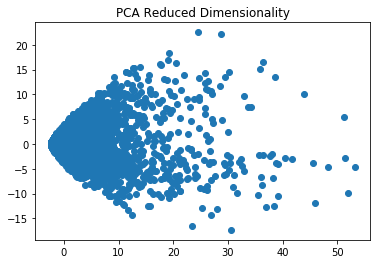

In [16]:
pca = decomposition.PCA(n_components=2) 
pca.fit(X_scaled) 
X_trans = pca.transform(X_scaled)
plt.scatter(X_trans[:,0],X_trans[:,1])
plt.title("PCA Reduced Dimensionality")
plt.show()

In [17]:
var = pca.explained_variance_ratio_
print(var)

[0.17620942 0.04189505]


In [ ]:
# 17.620942% of the variance is explained by the first component and 4.189505% of the variance is explained by the second.
# The difference between them is observable in the plot. 

In [18]:
i = 0
while i < 610:
    pca = decomposition.PCA(n_components=i)
    pca.fit(X_scaled)
    var = pca.explained_variance_ratio_
    if sum(var) >= 0.8:
        print(i)
        break
    i = i + 1

154


In [ ]:
# 154 principle components are needed to to explain 80% of the variance of the data.

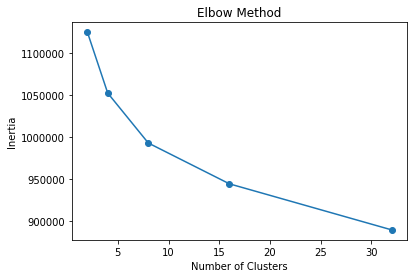

In [19]:
k = [2, 4, 8, 16, 32]
inertia = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    a = kmeans.fit(transposed_t)
    inertia.append(a.inertia_)
plt.plot(k, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
# # The most appropriate choice for k is 8 because the point of the plot is to minimize the number of clusters and inertia and to do this we have to identify the best elbow point. In this case it is k = 8.

In [ ]:
# The movies clustered together likely have similar ratings. 

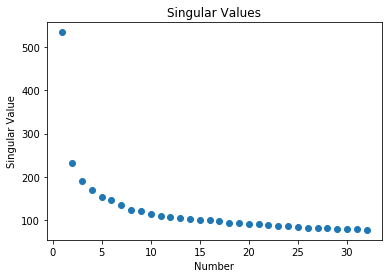

In [20]:
svd = TruncatedSVD(n_components = 32)
y = svd.fit(transposed_t)
plt.scatter(range(1, 33), y.singular_values_)
plt.title("Singular Values")
plt.xlabel("Number")
plt.ylabel("Singular Value")
plt.show()

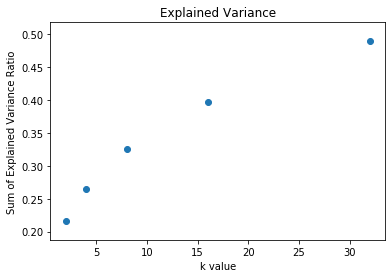

In [27]:
k = [2, 4, 8, 16, 32]
sum_evr = []
for i in k: 
    svd = TruncatedSVD(n_components = i)
    a = svd.fit(transposed_t)
    sum_evr.append(sum(a.explained_variance_ratio_))
plt.scatter(k, sum_evr)
plt.title("Explained Variance")
plt.xlabel("k value")
plt.ylabel("Sum of Explained Variance Ratio")
plt.show()

In [ ]:
# The explained variance graph shows that k = 8 is that ideal value because there's an elbow forming at around k = 8 and also it has a high amount of explained variance and a low amount of clusters. It's the inverse compared to the inertia values above. This supports my choice of k.

In [30]:
svd = TruncatedSVD(n_components = 2)
arr = svd.fit_transform(transposed_t)
print(arr)

[[ 3.76498261e+01 -6.37363667e+00]
 [ 2.05961905e+01 -4.66199626e-01]
 [ 8.50418300e+00 -5.71765709e+00]
 ...
 [ 3.45681586e-02  1.38364823e-01]
 [ 3.45681586e-02  1.38364823e-01]
 [ 1.45217586e-01  2.94093154e-01]]


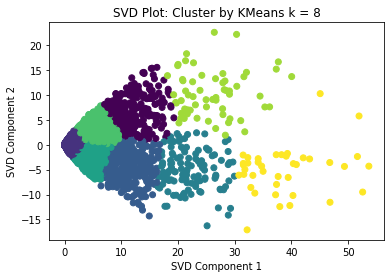

In [31]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(arr)
y_means = kmeans.predict(arr)
plt.scatter(arr[:,0], arr[:,1], c=y_means)
plt.title("SVD Plot: Cluster by KMeans k = 8")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

In [ ]:
# The clusters are close together and show very similar values. k = 8 is a good choice because the points in a similar area are clustered together. 